In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, cohen_kappa_score, precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.utils import resample

In [41]:
heart_data = "../data/raw/heart_disease_health_indicators_BRFSS2015.csv"
heart_df = pd.read_csv(heart_data)

In [42]:
heart_df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [43]:
heart_df.shape

(253680, 22)

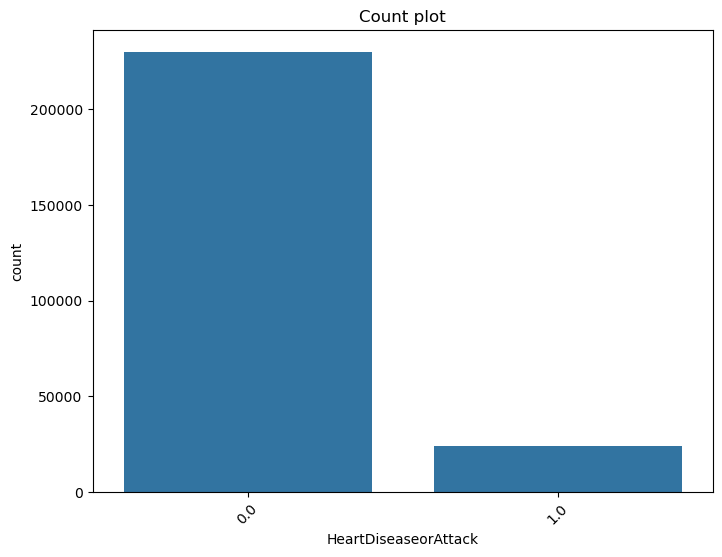

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_df, x='HeartDiseaseorAttack')
plt.title(f'Count plot')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

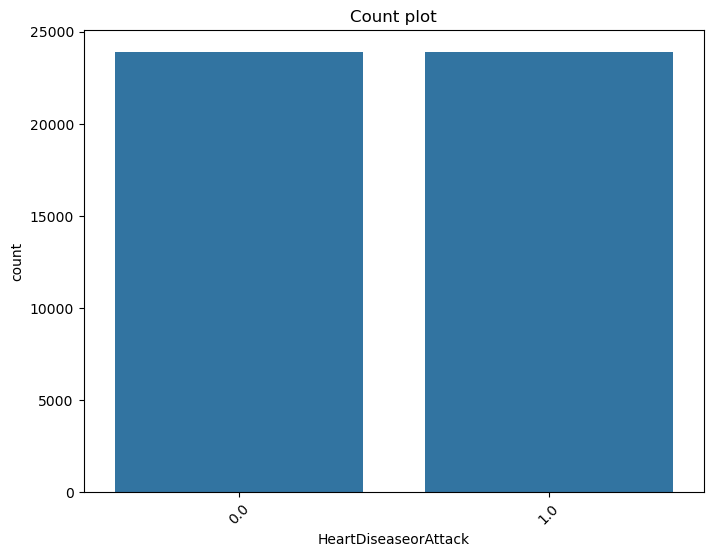

In [93]:
train = heart_df.copy()

heart_issues = train[train["HeartDiseaseorAttack"] == 1]
no_heart_issues = train[train["HeartDiseaseorAttack"] == 0]

undersampled_heart_df =  resample(no_heart_issues,
                         replace=False, 
                         n_samples = len(heart_issues),
                         random_state=0)

resampled_df = pd.concat([undersampled_heart_df, heart_issues])
resampled_df.to_csv('../data/clean/resampled_data.csv')


plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_df, x='HeartDiseaseorAttack')
plt.title(f'Count plot')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [46]:
target = resampled_df['HeartDiseaseorAttack']
features = resampled_df.drop('HeartDiseaseorAttack', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

#Normalise all columns to be 0-1
normalizer = MinMaxScaler()
normalizer.fit(x_train)

x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index )
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)


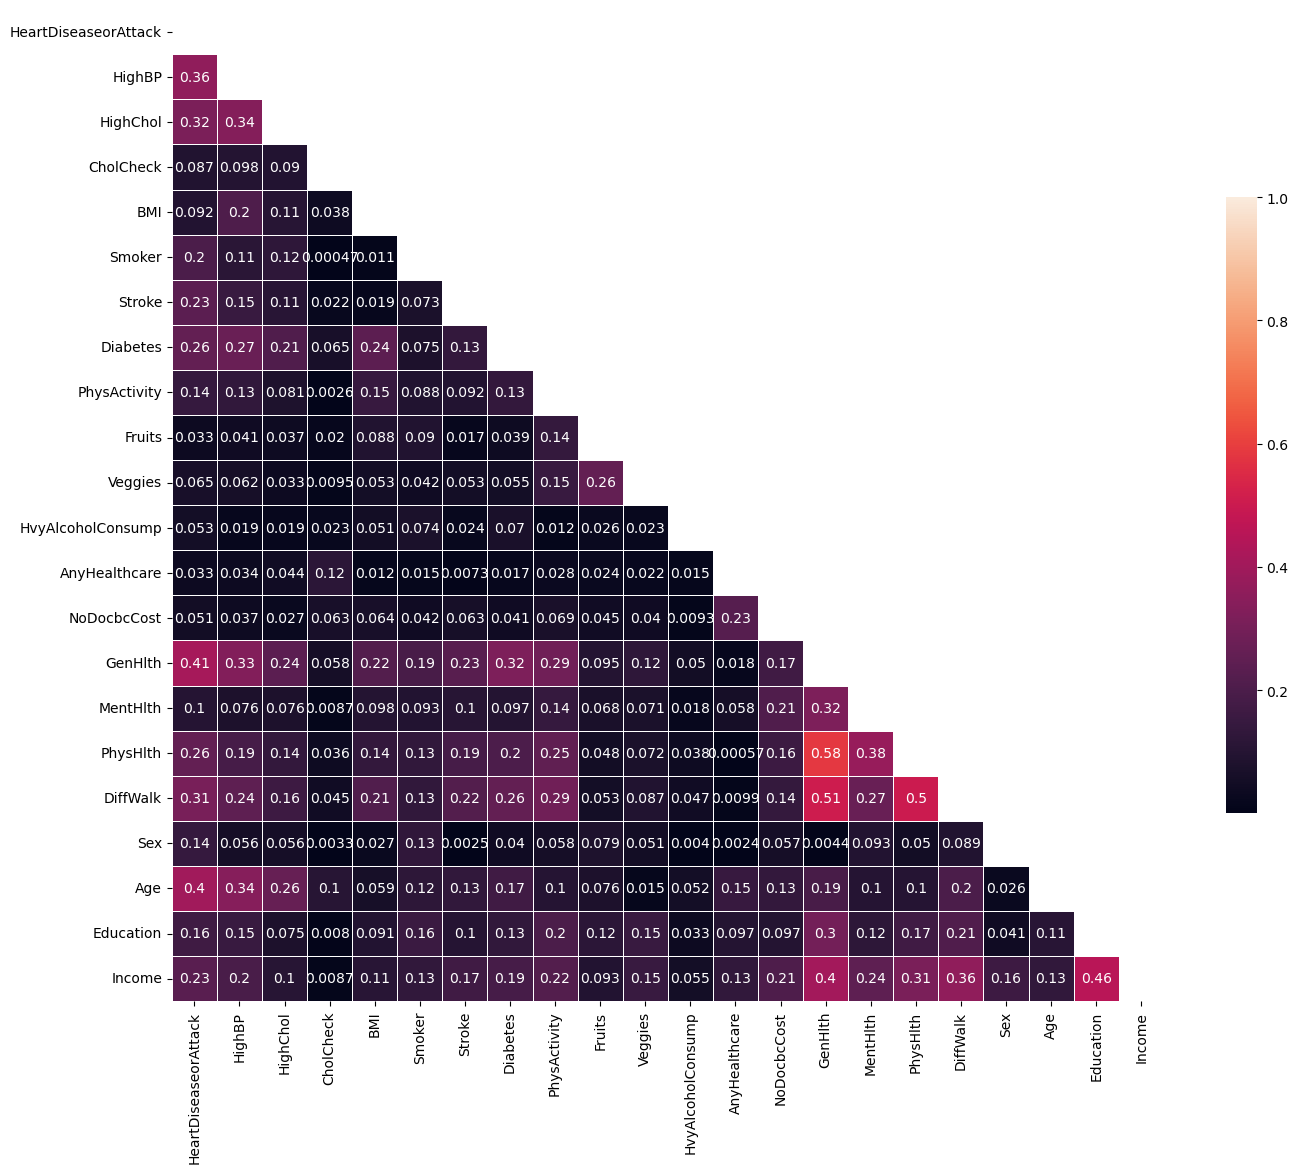

In [47]:
corr=np.abs(resampled_df.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [54]:
target = resampled_df['HeartDiseaseorAttack']
num_df = resampled_df.drop('HeartDiseaseorAttack', axis=1)

x_train, x_test, y_train, y_test = train_test_split(num_df, target, test_size=0.20, random_state=0)


for i in range(3, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    print(f"For {i} n_neighbours:")
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test) # This is the slowest step
    
    cm = confusion_matrix(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    print(f" Accuracy: {100*((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))): .2f}%")
    
    #print(f"The accuracy of the model vs the test with n_neighbours = {i}, is {knn.score(x_test, y_test)*100: .2f}%") # This is slow
    print(f"Cohen's Kappa: {kappa:.4f}")
    print(cm)
    print()

For 3 n_neighbours:
 Accuracy:  70.51%
Cohen's Kappa: 0.4102
[[3308 1484]
 [1335 3431]]

For 4 n_neighbours:
 Accuracy:  69.30%
Cohen's Kappa: 0.3858
[[3737 1055]
 [1879 2887]]

For 5 n_neighbours:
 Accuracy:  72.34%
Cohen's Kappa: 0.4468
[[3332 1460]
 [1184 3582]]

For 6 n_neighbours:
 Accuracy:  71.35%
Cohen's Kappa: 0.4269
[[3638 1154]
 [1584 3182]]

For 7 n_neighbours:
 Accuracy:  73.05%
Cohen's Kappa: 0.4611
[[3343 1449]
 [1127 3639]]

For 8 n_neighbours:
 Accuracy:  72.68%
Cohen's Kappa: 0.4536
[[3580 1212]
 [1399 3367]]

For 9 n_neighbours:
 Accuracy:  73.53%
Cohen's Kappa: 0.4707
[[3337 1455]
 [1075 3691]]

For 10 n_neighbours:
 Accuracy:  73.17%
Cohen's Kappa: 0.4635
[[3534 1258]
 [1306 3460]]



In [55]:
# Drop the column PhysHlth, because is correlated to the column GenHlth
# Drop the column DiffWalk, because is correlated to the column GenHlth
# Drop the column Education, because is correlated to the column Income
df_new = num_df.drop(['PhysHlth', 'DiffWalk','Education'],  axis=1)
df_new

#print("Setting up model")
x_train, x_test, y_train, y_test = train_test_split(df_new, target, test_size=0.20, random_state=0)

for i in range(3, 11):
    print(f"For n_neighbours: {i}")
    knn = KNeighborsClassifier(n_neighbors=i)
    #print("Fitting...")
    knn.fit(x_train, y_train)
    #print("Predicting...")
    y_pred = knn.predict(x_test) #This is the slowest step
    
    #print("Calculating metrics...")
    cm = confusion_matrix(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    
    print(f" Accuracy: {100*((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))): .2f}%")     
    print(f"Cohen's Kappa: {kappa:.4f}")
    print(cm)  
    print()

For n_neighbours: 3
 Accuracy:  71.16%
Cohen's Kappa: 0.4231
[[3344 1448]
 [1309 3457]]

For n_neighbours: 4
 Accuracy:  70.26%
Cohen's Kappa: 0.4048
[[3767 1025]
 [1818 2948]]

For n_neighbours: 5
 Accuracy:  72.87%
Cohen's Kappa: 0.4575
[[3361 1431]
 [1162 3604]]

For n_neighbours: 6
 Accuracy:  72.22%
Cohen's Kappa: 0.4443
[[3664 1128]
 [1527 3239]]

For n_neighbours: 7
 Accuracy:  73.60%
Cohen's Kappa: 0.4722
[[3365 1427]
 [1096 3670]]

For n_neighbours: 8
 Accuracy:  72.85%
Cohen's Kappa: 0.4569
[[3581 1211]
 [1384 3382]]

For n_neighbours: 9
 Accuracy:  74.00%
Cohen's Kappa: 0.4801
[[3360 1432]
 [1053 3713]]

For n_neighbours: 10
 Accuracy:  74.07%
Cohen's Kappa: 0.4815
[[3554 1238]
 [1240 3526]]



In [56]:
x_train.nunique()

HighBP                2
HighChol              2
CholCheck             2
BMI                  75
Smoker                2
Stroke                2
Diabetes              3
PhysActivity          2
Fruits                2
Veggies               2
HvyAlcoholConsump     2
AnyHealthcare         2
NoDocbcCost           2
GenHlth               5
MentHlth             31
Sex                   2
Age                  13
Income                8
dtype: int64

In [83]:
#Normalise all columns to be 0-1
normalizer = MinMaxScaler()
normalizer.fit(x_train)

x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index )
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)

# Evaluate the model on the test set
for i in range(5, 21):
    print(f"For n_neighbors: {i}")
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_norm, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    
    print(f" Accuracy: {100*((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))): .2f}%")        
    print(f"Cohen's Kappa: {kappa:.4f}")   
    #print(cm)
    print()

For n_neighbors: 5
 Accuracy:  52.71%
Cohen's Kappa: 0.0561

For n_neighbors: 6
 Accuracy:  57.61%
Cohen's Kappa: 0.1525

For n_neighbors: 7
 Accuracy:  55.26%
Cohen's Kappa: 0.1071

For n_neighbors: 8
 Accuracy:  59.05%
Cohen's Kappa: 0.1819

For n_neighbors: 9
 Accuracy:  56.24%
Cohen's Kappa: 0.1266

For n_neighbors: 10
 Accuracy:  60.47%
Cohen's Kappa: 0.2106

For n_neighbors: 11
 Accuracy:  58.09%
Cohen's Kappa: 0.1636

For n_neighbors: 12
 Accuracy:  63.33%
Cohen's Kappa: 0.2677

For n_neighbors: 13
 Accuracy:  60.85%
Cohen's Kappa: 0.2185

For n_neighbors: 14
 Accuracy:  65.79%
Cohen's Kappa: 0.3167

For n_neighbors: 15
 Accuracy:  63.44%
Cohen's Kappa: 0.2702

For n_neighbors: 16
 Accuracy:  67.86%
Cohen's Kappa: 0.3579

For n_neighbors: 17
 Accuracy:  65.30%
Cohen's Kappa: 0.3070

For n_neighbors: 18
 Accuracy:  69.36%
Cohen's Kappa: 0.3877

For n_neighbors: 19
 Accuracy:  67.35%
Cohen's Kappa: 0.3478

For n_neighbors: 20
 Accuracy:  69.13%
Cohen's Kappa: 0.3828



In [87]:
#Normalise all columns to be 0-1
normalizer = MinMaxScaler()
normalizer.fit(x_train)

x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index )
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)


# Evaluate the model on the test set
for i in range(5, 21):
    print(f"For n_neighbors: {i}")
    knn = KNeighborsClassifier(n_neighbors=i, weights="distance")
    knn.fit(x_train_norm, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    
    print(f" Accuracy: {100*((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))): .2f}%")        
    print(f"Cohen's Kappa: {kappa:.4f}")   
    #print(cm)
    print()

For n_neighbors: 5
 Accuracy:  52.71%
Cohen's Kappa: 0.0561

For n_neighbors: 6
 Accuracy:  57.46%
Cohen's Kappa: 0.1504

For n_neighbors: 7
 Accuracy:  55.26%
Cohen's Kappa: 0.1071

For n_neighbors: 8
 Accuracy:  57.86%
Cohen's Kappa: 0.1589

For n_neighbors: 9
 Accuracy:  56.24%
Cohen's Kappa: 0.1266

For n_neighbors: 10
 Accuracy:  57.59%
Cohen's Kappa: 0.1536

For n_neighbors: 11
 Accuracy:  58.09%
Cohen's Kappa: 0.1636

For n_neighbors: 12
 Accuracy:  59.33%
Cohen's Kappa: 0.1884

For n_neighbors: 13
 Accuracy:  60.85%
Cohen's Kappa: 0.2185

For n_neighbors: 14
 Accuracy:  60.50%
Cohen's Kappa: 0.2117

For n_neighbors: 15
 Accuracy:  63.44%
Cohen's Kappa: 0.2702

For n_neighbors: 16
 Accuracy:  62.26%
Cohen's Kappa: 0.2467

For n_neighbors: 17
 Accuracy:  65.30%
Cohen's Kappa: 0.3070

For n_neighbors: 18
 Accuracy:  63.95%
Cohen's Kappa: 0.2802

For n_neighbors: 19
 Accuracy:  67.35%
Cohen's Kappa: 0.3478

For n_neighbors: 20
 Accuracy:  65.99%
Cohen's Kappa: 0.3208



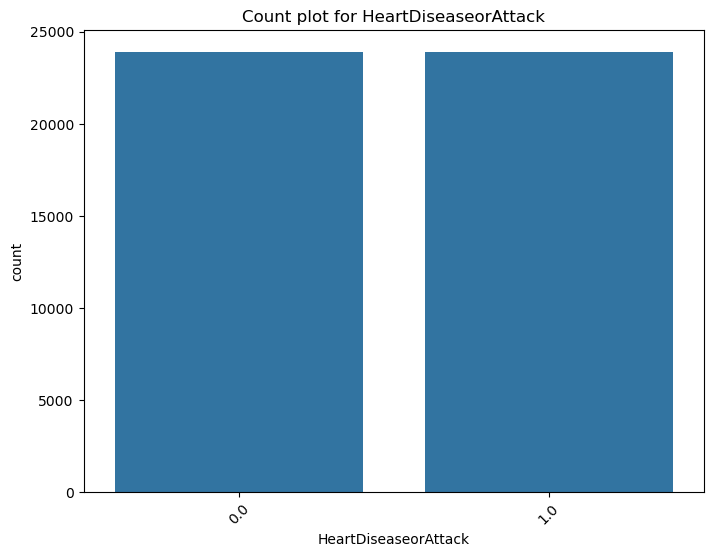

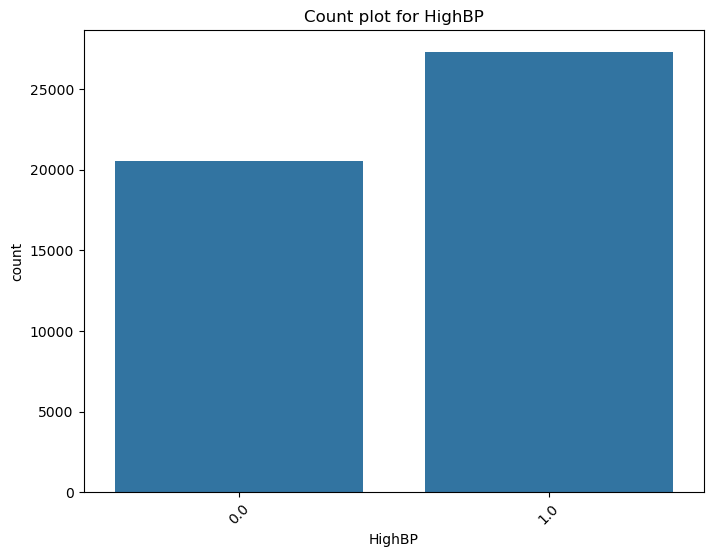

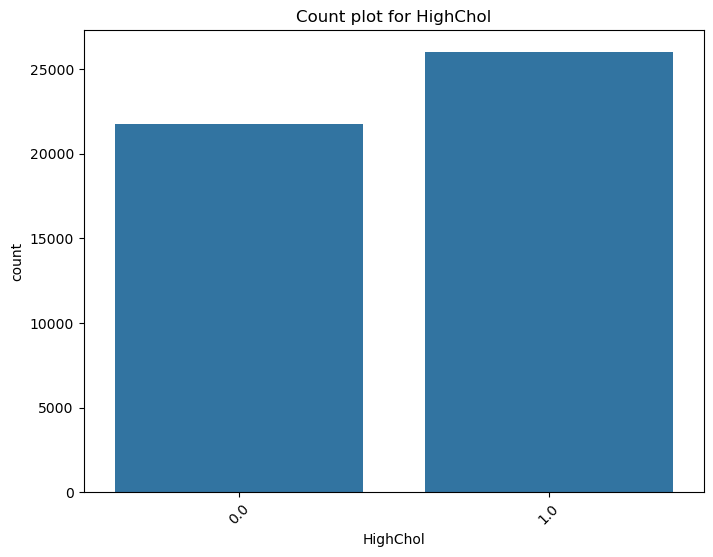

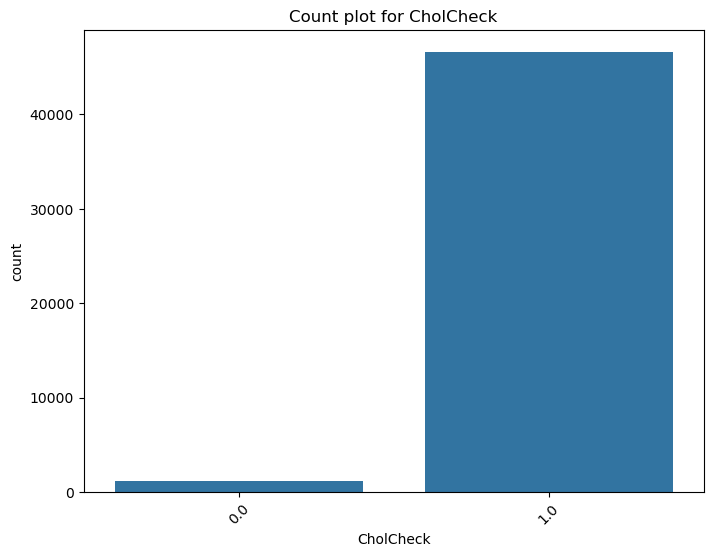

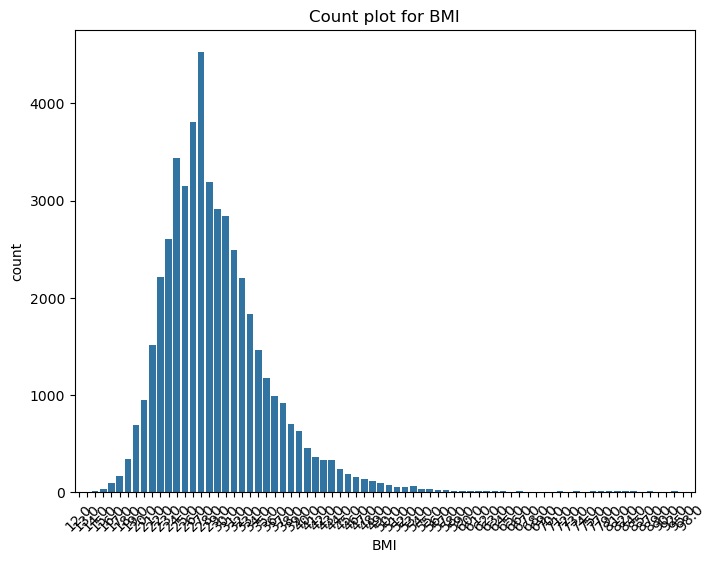

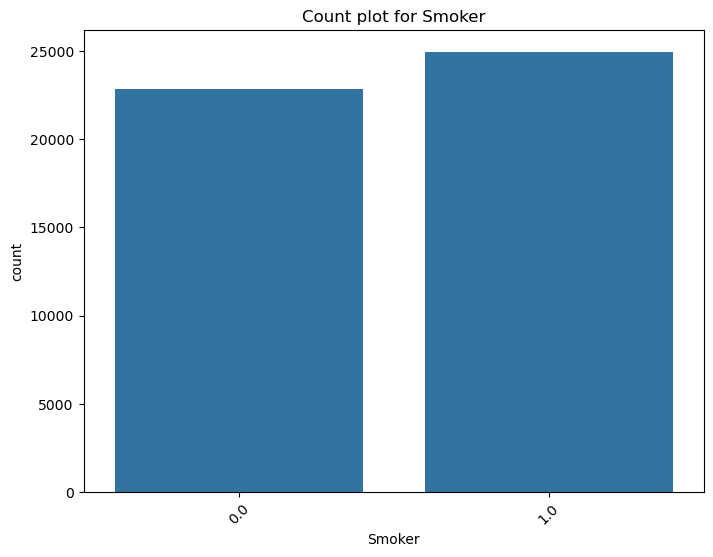

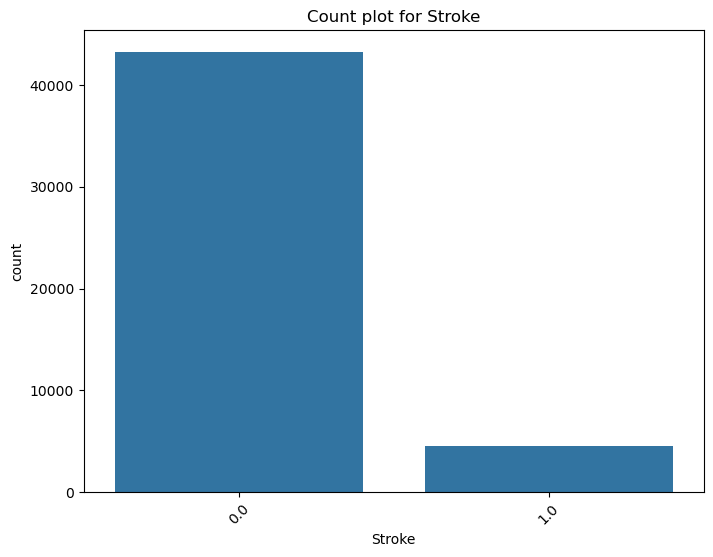

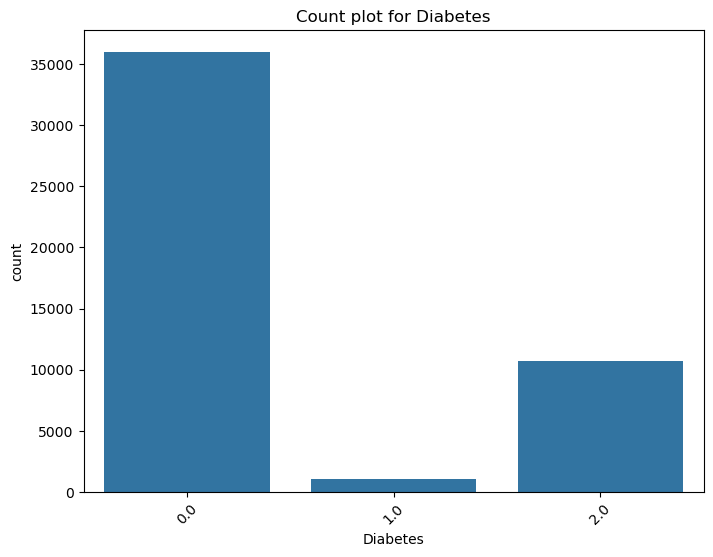

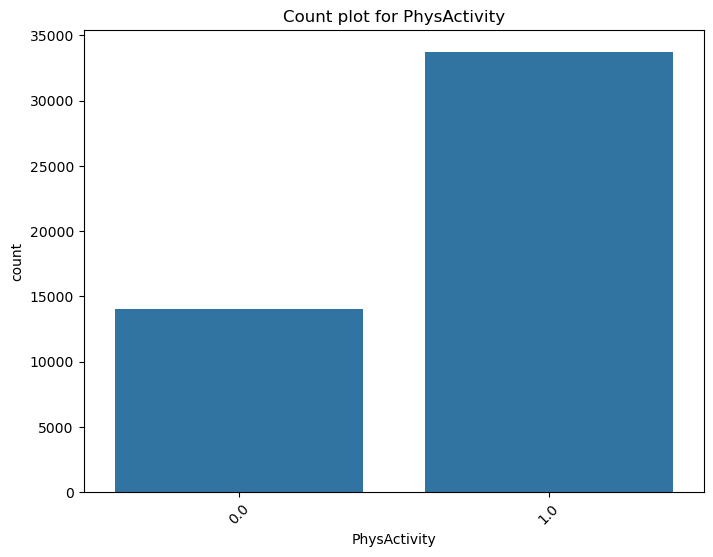

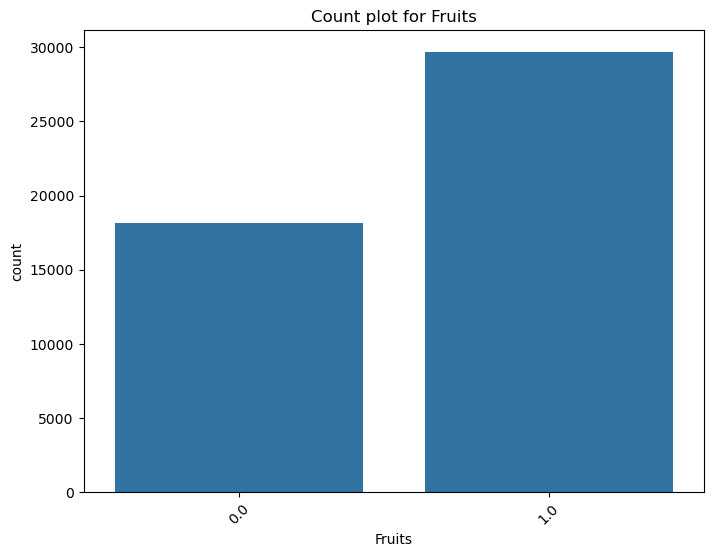

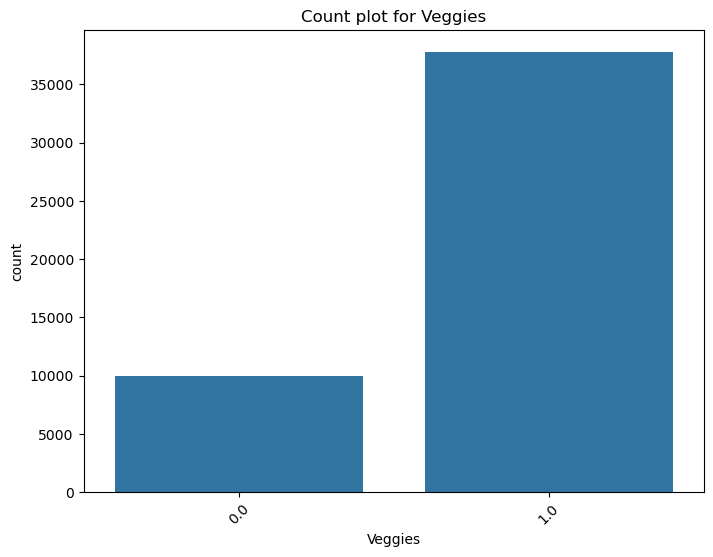

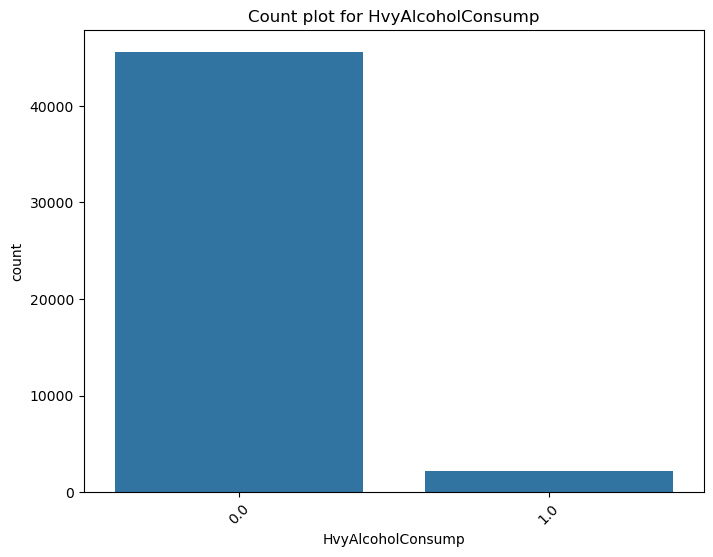

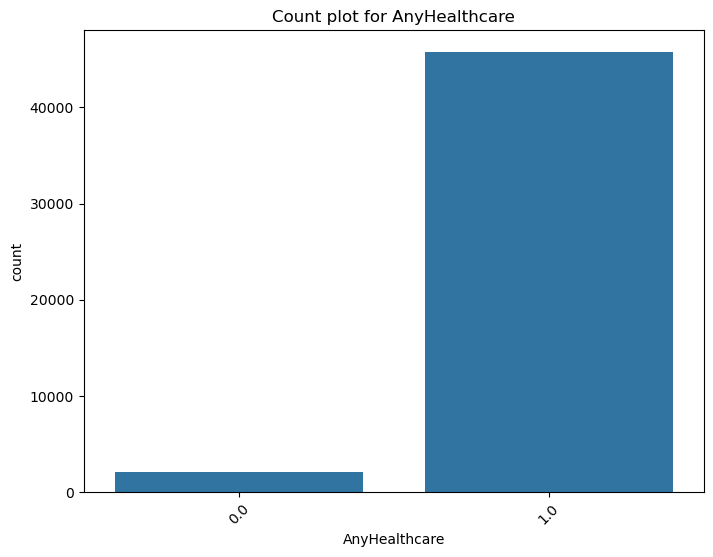

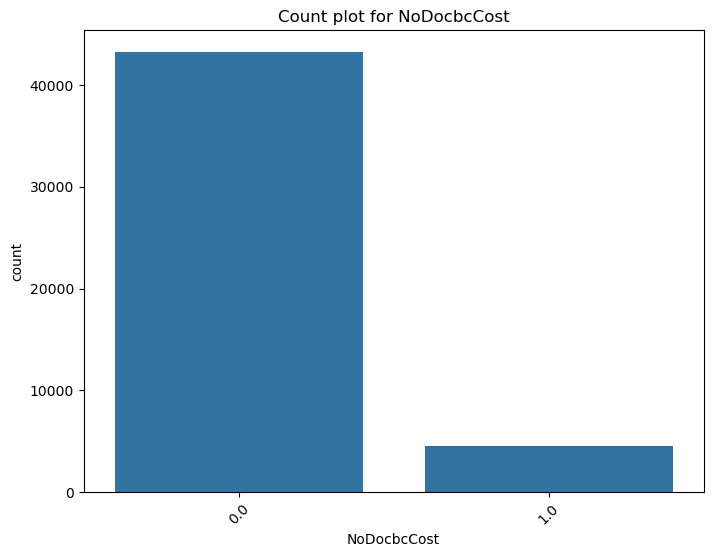

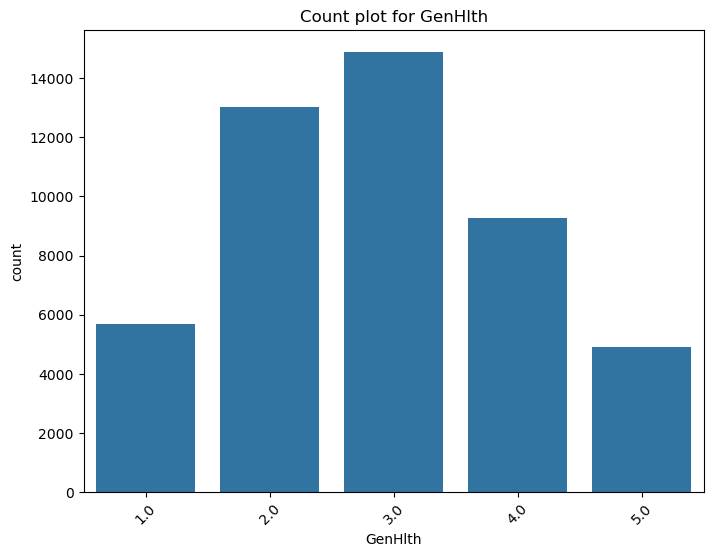

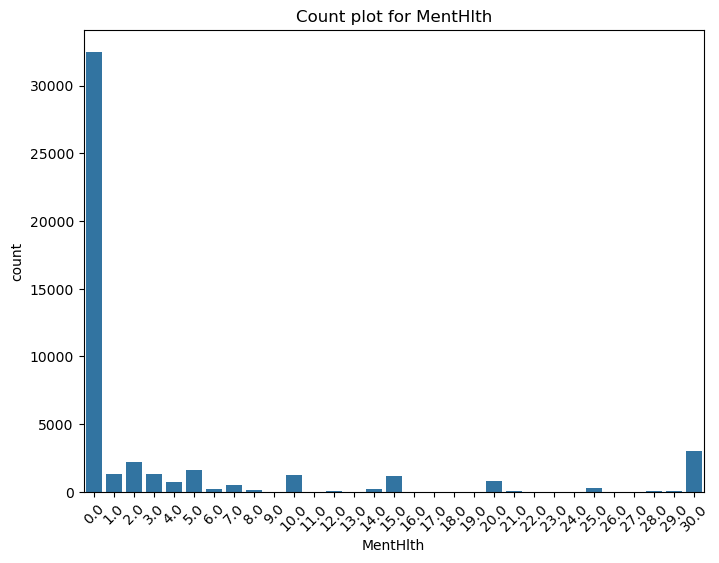

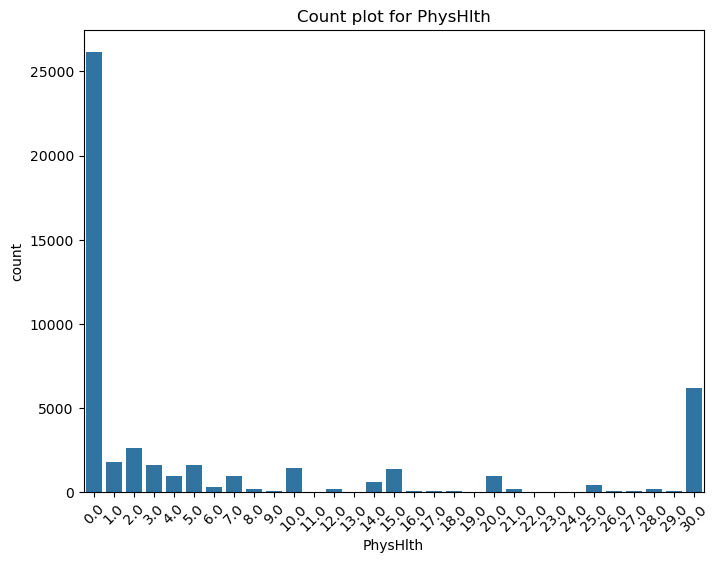

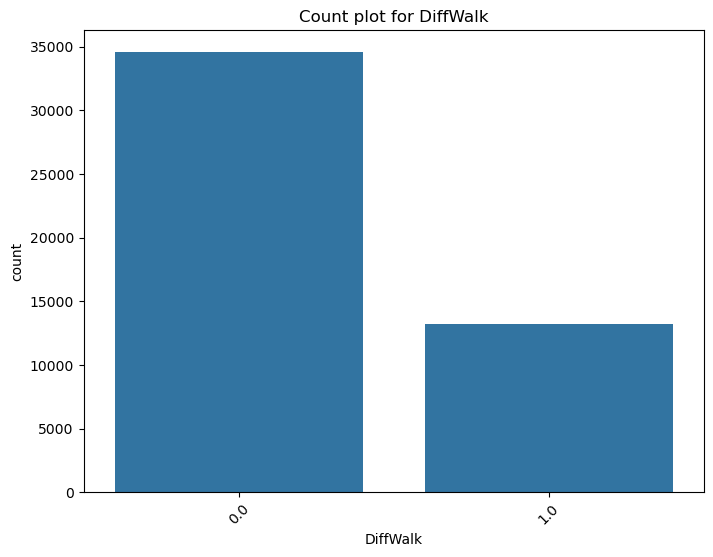

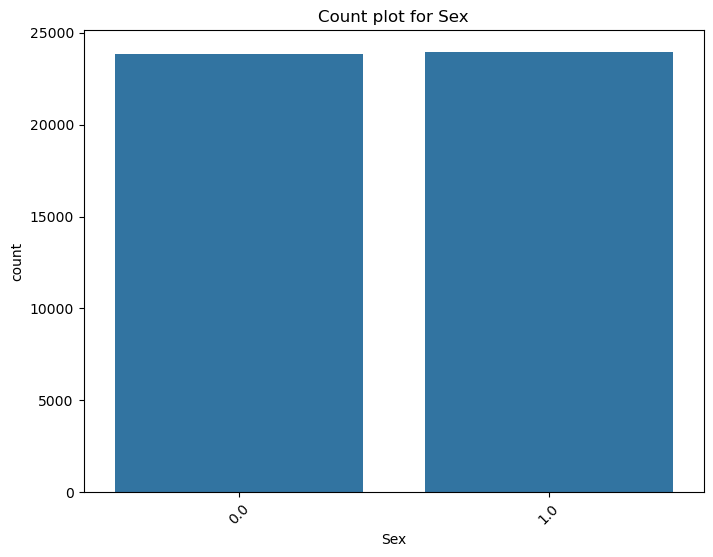

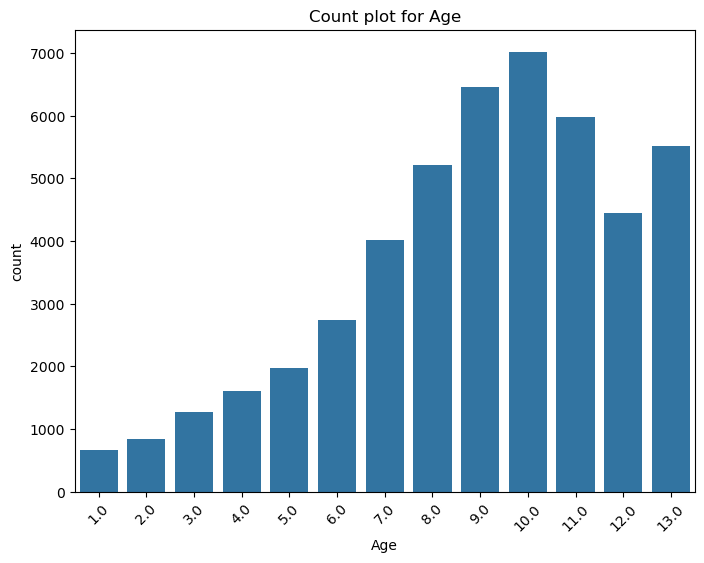

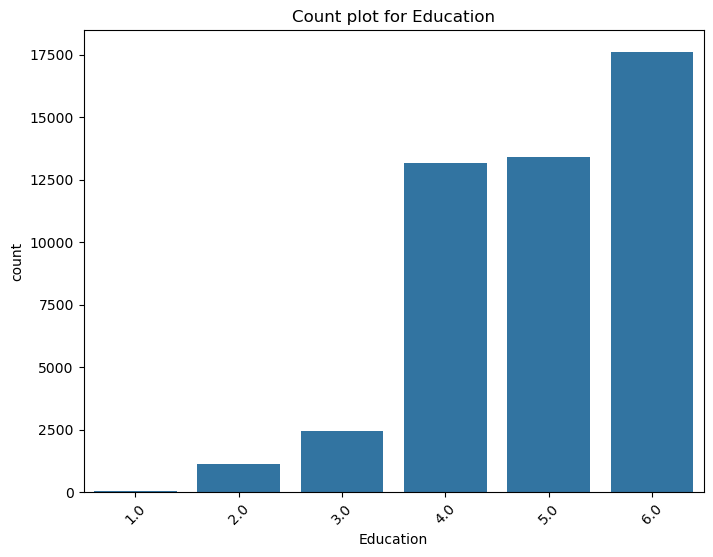

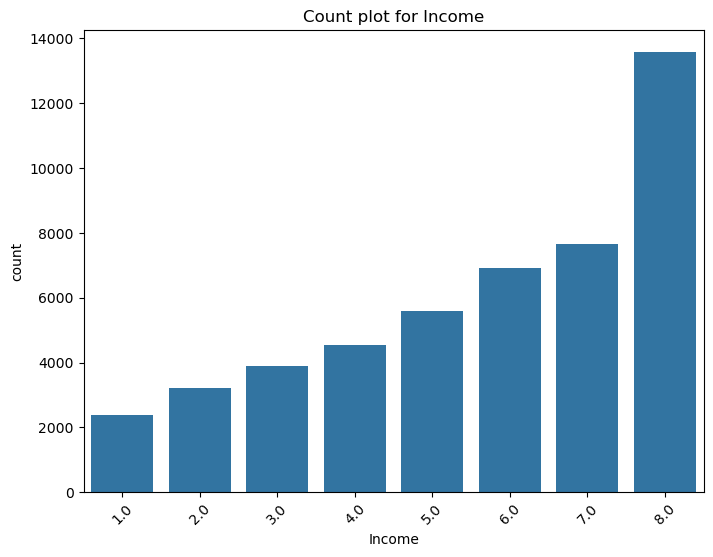

In [58]:
for col in resampled_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=resampled_df, x=col, hue='HeartDiseaseorAttack')
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

In [67]:
# Evaluate the model on the test set by column
result_dict = {}

for i in range(len(x_train_norm.columns) - 1):
    col1 = x_train_norm.columns[i]
    
    for j in range(i + 1, len(x_train_norm.columns)):
        col2 = x_train_norm.columns[j]
        
        if x_train_norm[col1].nunique() < 4 and x_train_norm[col2].nunique() < 4:
            continue
        else:
            print(f"For {col1} & {col2}:")    
            knn = KNeighborsClassifier(n_neighbors=16)
            knn.fit(x_train_norm[[col1, col2]], y_train)
            y_pred = knn.predict(x_test_norm[[col1, col2]])
            
            # Confusion matrix
            cm = confusion_matrix(y_test, y_pred)

            # Calculate accuracy
            accuracy = (cm[0][0] + cm[1][1]) / (sum(cm[0]) + sum(cm[1]))
            
            # Calculate Kappa score
            kappa = cohen_kappa_score(y_test, y_pred)
                        
            print(f" Accuracy: {100*(accuracy): .2f}%")
            print(f"Cohen's Kappa: {kappa:.4f}")
            #print(cm)
            print()

            result_dict[(col1, col2)] = {
                "col1": col1,
                "col2": col2,
                "kappa": kappa,
                "accuracy": accuracy
            }

print(result_dict)

For HighBP & BMI:
 Accuracy:  64.64%
Cohen's Kappa: 0.2926

For HighBP & GenHlth:
 Accuracy:  70.63%
Cohen's Kappa: 0.4125

For HighBP & MentHlth:
 Accuracy:  67.35%
Cohen's Kappa: 0.3471

For HighBP & Age:
 Accuracy:  67.65%
Cohen's Kappa: 0.3530

For HighBP & Income:
 Accuracy:  65.79%
Cohen's Kappa: 0.3158

For HighChol & BMI:
 Accuracy:  64.51%
Cohen's Kappa: 0.2903

For HighChol & GenHlth:
 Accuracy:  58.79%
Cohen's Kappa: 0.1756

For HighChol & MentHlth:
 Accuracy:  65.09%
Cohen's Kappa: 0.3017

For HighChol & Age:
 Accuracy:  67.07%
Cohen's Kappa: 0.3415

For HighChol & Income:
 Accuracy:  63.06%
Cohen's Kappa: 0.2608

For CholCheck & BMI:
 Accuracy:  52.14%
Cohen's Kappa: 0.0422

For CholCheck & GenHlth:
 Accuracy:  66.52%
Cohen's Kappa: 0.3296

For CholCheck & MentHlth:
 Accuracy:  53.45%
Cohen's Kappa: 0.0675

For CholCheck & Age:
 Accuracy:  65.15%
Cohen's Kappa: 0.3033

For CholCheck & Income:
 Accuracy:  61.63%
Cohen's Kappa: 0.2329

For BMI & Smoker:
 Accuracy:  55.27%
Co

In [75]:
result_df = pd.DataFrame.from_dict(result_dict, orient='index')
result_df = result_df.reset_index()
result_df = result_df[['col1', 'col2', 'kappa', 'accuracy']]
result_df.head()


,col1,col2,kappa,accuracy
0,HighBP,BMI,0.292606,0.646370
1,HighBP,GenHlth,0.412512,0.706319
2,HighBP,MentHlth,0.347079,0.673467
3,HighBP,Age,0.352978,0.676501
4,HighBP,Income,0.315825,0.657878


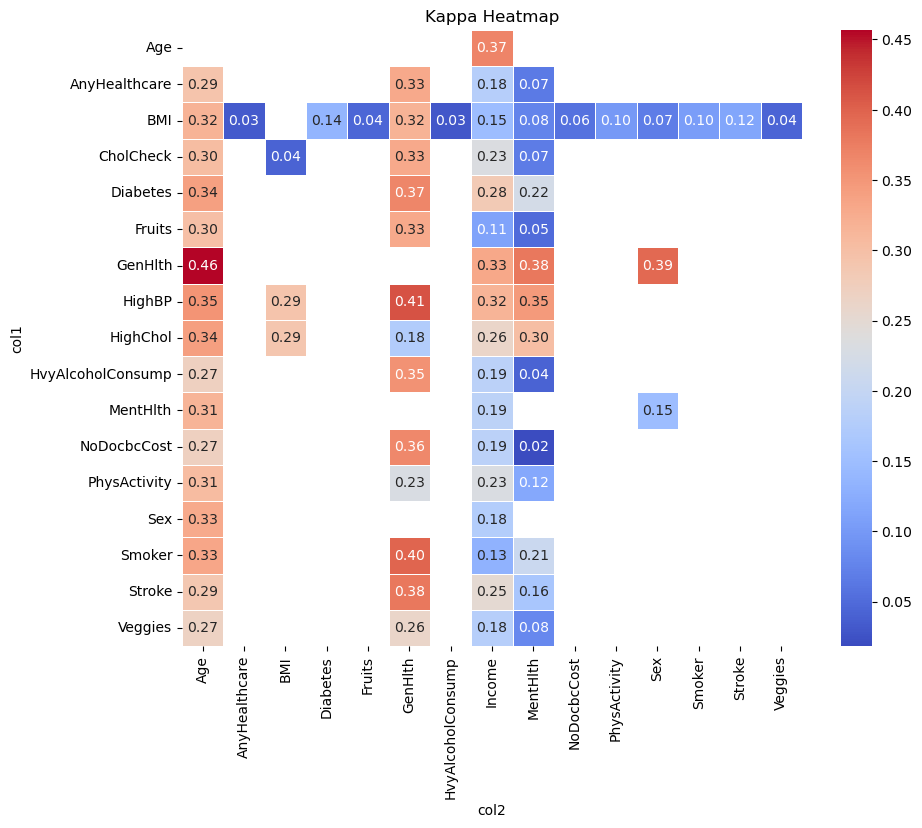

In [77]:
heatmap_data = result_df.pivot(index='col1', columns='col2', values='kappa')

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size if needed
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Kappa Heatmap')
plt.xlabel('col2')
plt.ylabel('col1')
plt.show()

In [89]:
heatmap_data = result_df.pivot(index='col1', columns='col2', values='kappa')

heatmap_data

col2,NaN,GenHlth,MentHlth,Age,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,Sex
col1,,,,,,,,,,,,,,,
BMI,0.147862,0.317464,0.075250,0.317619,NaN,0.104989,0.115049,0.13599,0.09958,0.044638,0.043876,0.029161,0.033448,0.057468,0.068549
CholCheck,0.232872,0.329643,0.067508,0.303286,0.042173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HighChol,0.260775,0.175568,0.301707,0.341518,0.290280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HighBP,0.315825,0.412512,0.347079,0.352978,0.292606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fruits,0.112113,0.329643,0.049430,0.299391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smoker,0.132044,0.397858,0.206877,0.332624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stroke,0.250541,0.380684,0.162775,0.288740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diabetes,0.282652,0.367662,0.222012,0.339825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysActivity,0.231864,0.229338,0.118214,0.305871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
